# SVIC: Señales de Variable Independiente Contína

## Declaración de Funciones

- El nombre del archivo debe coincidir con el de la función, y contener la extensión ".m". 
- Las salidas pueden estar vacías "```[]```" ser una "```y```" o un vector "```[y1,y2,y3]```".
- Las entradas de pasan como parámetros de la función

In [1]:
% nombre archivo "nuevaFuncion.m"
% funcion "nuevaFuncion" con entradas x1,...,xM y salidas y1,...,yN
% Debe contener la palabra clave function
% 
% function [y1,...,yN] = nombreFuncion(x1,...,xM)

function f = triarea(b,h)
    f = b .* h ./ 2;
end

## Funciones Trigonométricas

MATLAB cuenta internamente con funciones exponencial, seno y coseno. Los argumentos se interpretan en radianes.

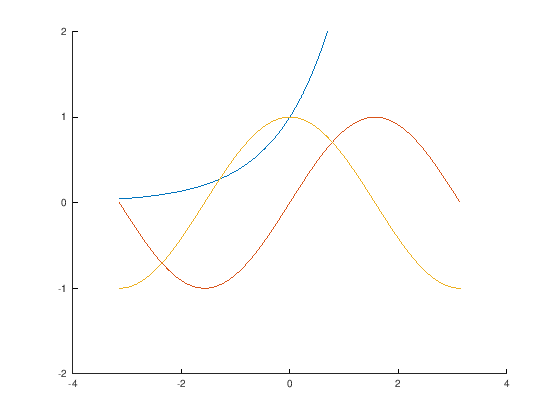

In [35]:
clear all

function y = setup();
    subplot(1,1,1)
    axis([-4,4,-2,2]);
end;
setup();

t = -pi:1/100:pi;
x1 = exp(t);
x2 = sin(t);
x3 = cos(t);

hold on;
plot(t,x1);
plot(t,x2);
plot(t,x3);

## Funciones Singulares

Estas funciones modelan el comportamiento de muchos fenómenos físicos del mundo real.

### Funcion Signo

Predefinida en MATLAB.

- 1, t > 0
- 0, t = 0
- 1, t < 0

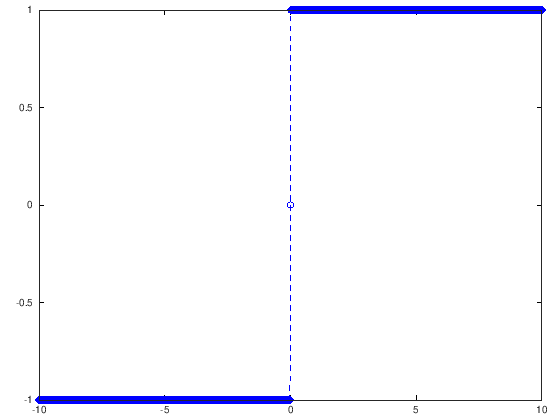

In [58]:
clear all;

t = -10:1/50:10;
x = sign(t);
plot(t,x,"bo--");



### Función Escalón u(t)

- 1, t > 0
- 0, t < 0

t=0 es indistinto. Las diferentes bibliografías especifican valores de 0, 1 y 1/2.

Se puede implementar la función escalón en MATLAB utilizando el siguiente código

error: 'setup' undefined near line 1 column 1


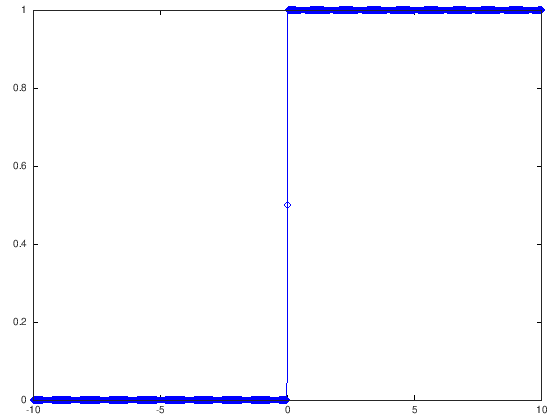

In [50]:
function y = u(t)
    y = (sign(t) + 1) / 2;
end
x5 = u(t);

setup();
plot(t,x5,'bd-');

### Función Cajón

También llamada rectangulo unitario, ya que su base por altura dan un área de 1. Muchas veces recibe el nombre de "gate" ya que es cero en cualquier instante fuera del rango no-cero.

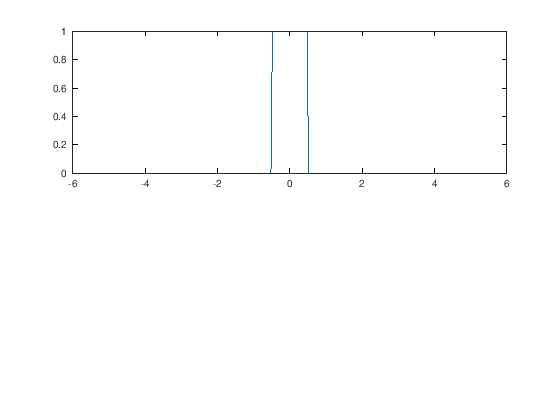

In [120]:
clear all;

function y = u(t)
    y = (sign(t) + 1) / 2;
end

function y = rect(t)
    y = u(t+0.5) - u(t-0.5);
end

t = -5:1/50:5;
x = rect(t);

subplot(2 ,1 ,1);
axis([-4, 4, -4, 4],"manual");
plot(t,x);

### Rampa

- t, t > 0
- 0, t <= 0

La función rampa es la integral de la función escalón.

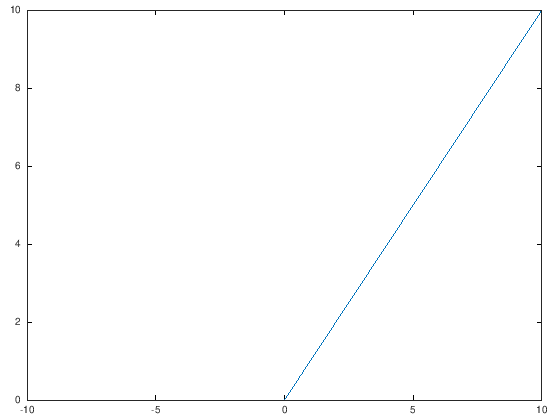

In [60]:
function y = u(t)
    y = (sign(t) + 1) / 2;
end

function y = ramp(t)
    y = t .* u(t);
end;

x6 = ramp(t);
plot(t,x6);

### Delta de Dirac

MATLAB posee una función llamada ```dirac``` que retorna infinito para t = t0 y 0 en los otros valores de la recta real.

Es una definición muy acotada de la función delta y no es conveniente utilizarla en análisis de señales.


### Función Sinc o Seno Cardinal

#### Sinc normalizado

La función sinc(x), también llamada "sampling function" se usa en procesamiento de señales y en la teoria de Transformadas de Fourier.

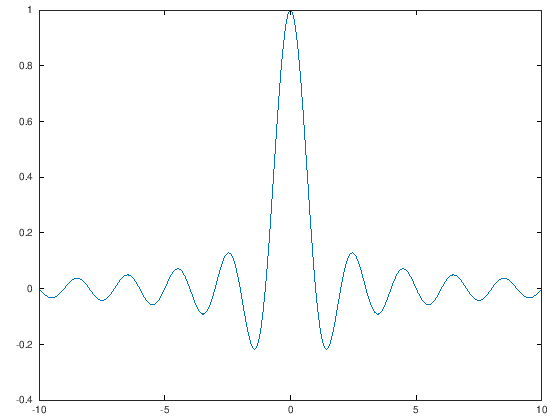

In [71]:
% funcion sinc
%
% sinc(t) = sin(pi * t) / (pi * t)
%
function y = sinc(t)
    y = sin(pi .* t) ./ (pi .* t);
end

x7 = sinc(t);
plot(t,x7); 


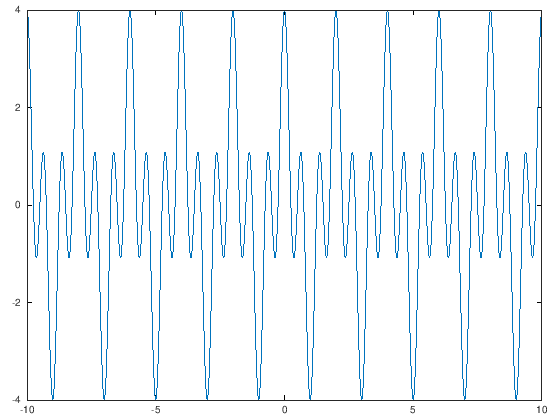

In [74]:
% funcion sind
% 
function y = sind(t,N)
    y = sin(pi * N .* t) ./ sin(pi .* t);
end;
n = 4;
x8 = sind(t,n);
plot(t,x8);

## Escalado y Desplazamiento de SVID

### Escala de Amplitud

```Ag(x)```

### Desplazamiento en el tiempo

```t -> (t-t0)```

- t0 > 0 -> shift a derecha
- t0 < 0 -> shift a izquierda


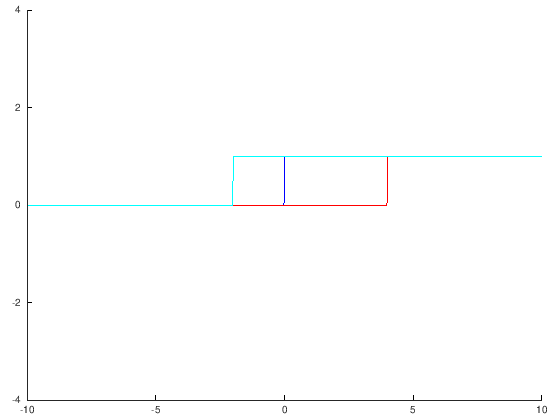

In [86]:
function y = u(t)
    y = (sign(t) + 1) / 2;
end


t= -10:1/50:10;
x1 = u(t);
x2 = u(t-4);
x3 = u(t+2);

hold on;
axis([-10,10,-2,2]);
plot(t,x1,'b');
plot(t,x2,'r');
plot(t,x3,'c');

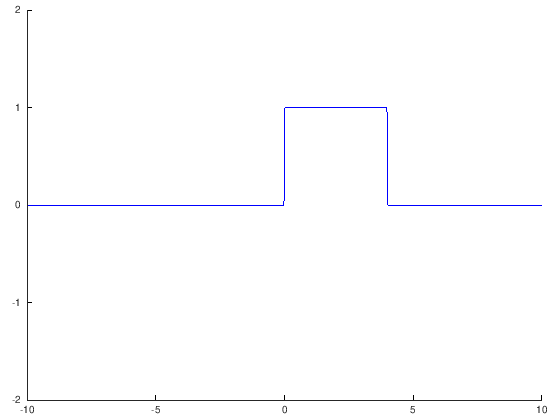

In [87]:
function y = u(t)
    y = (sign(t) + 1) / 2;
end


t= -10:1/50:10;
x1 = u(t);
x2 = u(t-4);
x = x1 - x2;

hold on;
axis([-10,10,-2,2]);
plot(t,x,'b');

### Amplitud en Tiempo (Modulación de Amplitud)

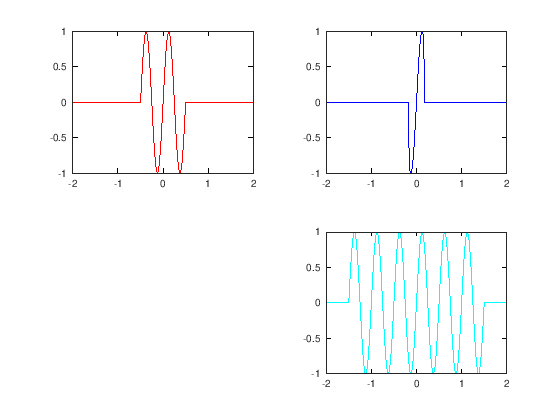

In [138]:
clear all;

function y = u(t)
    y = (sign(t) + 1) / 2;
end

function y = rect(t)
    y = u(t+0.5) - u(t-0.5);
end

t = -2:1/50:2;
f = sin(4 * pi .* t);


x1 = f .* rect(t) ;
subplot(2, 2, 1) ; axis([-2, 2, -2, 2]); plot(t, x1, 'r');

a = 3;
x2 = f .* rect(a * t);
subplot(2, 2, 2) ; axis([-2, 2, -2, 2]); plot(t, x2, 'b');

b = 1/3;
x3 = f .* rect(b * t);
subplot(2, 2, 4) ; axis([-2, 2, -2, 2]); plot(t, x3, 'c');

## Funciones a Trozos

f(t) = { 
   - 0 t<-5;
   - sin(t) -5<t<0
   - 3t t>0;

}